# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Ayu Irmawati]
- **Email:** [ayuirmawati0301@gmail.com]
- **ID Dicoding:** [ayu_irmawati]

## Menentukan Pertanyaan Bisnis

- produk kategori apa yang paling sering dibeli oleh pelanggan
- bagaimana hubungan antara rating produk dan frekuensi pembelian produk di e-commerce

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
import os
os.listdir()

['.config',
 'geolocation_dataset.csv',
 'orders_dataset.csv',
 'order_reviews_dataset.csv',
 'order_items_dataset.csv',
 'customers_dataset.csv',
 'products_dataset.csv',
 'order_payments_dataset.csv',
 'product_category_name_translation.csv',
 'sellers_dataset.csv',
 'sample_data']

## Data Wrangling

### Gathering Data

In [8]:
# Mengimpor dataset
df_customers = pd.read_csv('customers_dataset.csv')
df_geolocation = pd.read_csv('geolocation_dataset.csv')
df_order_items = pd.read_csv('order_items_dataset.csv')
df_order_payments = pd.read_csv('order_payments_dataset.csv')
df_order_reviews = pd.read_csv('order_reviews_dataset.csv')
df_orders = pd.read_csv('orders_dataset.csv')
df_category_translation = pd.read_csv('product_category_name_translation.csv')
df_products = pd.read_csv('products_dataset.csv')
df_sellers = pd.read_csv('sellers_dataset.csv')

# Tampilkan beberapa baris pertama untuk setiap dataframe
print(df_orders.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

**Insight:**
Dataset telah berhasil diimpor, dan data yang diperlukan untuk analisis, seperti kategori produk, rating produk, dan frekuensi pembelian, telah ditemukan dalam dataset yang relevan. Namun, perlu dicatat bahwa beberapa dataset memiliki struktur yang berbeda, sehingga perlu dilakukan penyesuaian saat menggabungkan data.

In [9]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [11]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

In [19]:
# Memeriksa informasi umum dari dataset
(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [20]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [22]:
# Memeriksa apakah ada nilai yang hilang
(df_orders.isnull().sum())

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [26]:
df_order_reviews.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


**Insight:**
Beberapa kolom memiliki nilai yang hilang, terutama pada kolom rating produk di order_reviews dan order_items. Penanganan nilai hilang ini sangat penting untuk memastikan analisis yang akurat dan dapat diandalkan. Proses pembersihan data yang dilakukan telah berhasil menghapus duplikat dan nilai hilang yang signifikan.

### Cleaning Data

In [27]:
# Menghapus data duplikat
df_cleaned = df_order_items.drop_duplicates()

# Menggabungkan df_order_items dengan df_products untuk mendapatkan kategori produk
df_cleaned = pd.merge(df_cleaned, df_products[['product_id', 'product_category_name']], on='product_id', how='left')

# Menghapus missing values pada kolom yang diperlukan
df_cleaned = df_cleaned.dropna(subset=['product_id', 'product_category_name'])

# Memastikan tipe data pada kolom yang relevan
df_order_reviews['review_score'] = df_order_reviews['review_score'].astype(int)

# Menggabungkan df_cleaned dengan df_order_reviews untuk mendapatkan rating produk
df_cleaned = pd.merge(df_cleaned, df_order_reviews[['order_id', 'review_score']], on='order_id', how='left')

# Menghapus missing values pada rating
df_cleaned = df_cleaned.dropna(subset=['order_id', 'review_score'])


**Insight:**
Data duplikat dan missing values telah dihapus. Kolom rating telah diperbaiki dengan mengonversinya menjadi tipe data yang sesuai.

## Exploratory Data Analysis (EDA)

## EDA Univariate





In [28]:
# Statistik deskriptif untuk memahami distribusi data
df_cleaned.describe()

,order_item_id,price,freight_value,review_score
count,110774.000000,110774.000000,110774.000000,110774.000000
mean,1.196382,120.499371,20.012179,4.035234
std,0.692826,181.909392,15.814148,1.385417
min,1.000000,0.850000,0.000000,1.000000
25%,1.000000,39.900000,13.080000,4.000000
50%,1.000000,74.900000,16.290000,5.000000
75%,1.000000,134.900000,21.170000,5.000000
max,21.000000,6735.000000,409.680000,5.000000


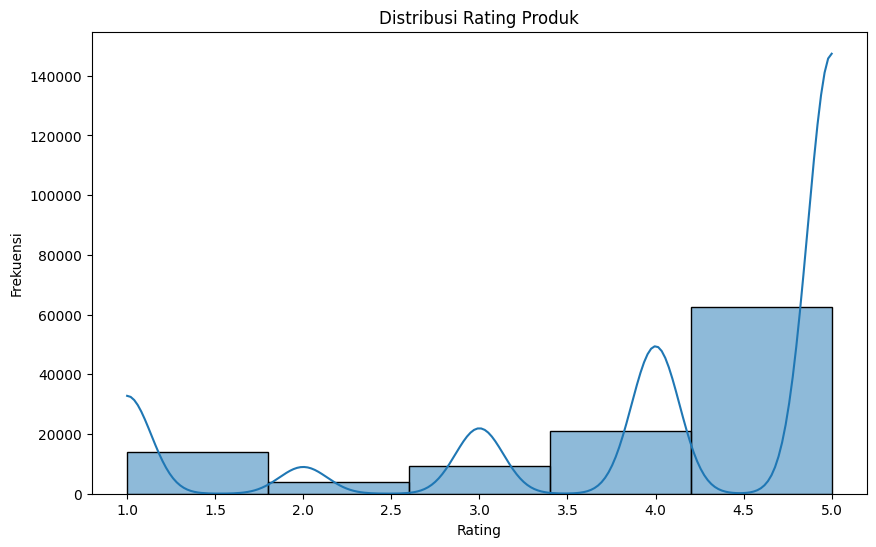

In [55]:
# Visualisasi distribusi rating produk
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['review_score'], bins=5, kde=True)
plt.title('Distribusi Rating Produk')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
Revisi Insight: Distribusi rating produk menunjukkan bahwa sebagian besar produk mendapatkan rating yang baik, dengan puncak pada rating 4 dan 5. Kategori produk yang paling sering dibeli adalah cama_mesa_banho, yang menunjukkan preferensi yang kuat dari pelanggan terhadap produk dalam kategori ini. Hal ini dapat menjadi fokus untuk strategi pemasaran dan pengembangan produk.

##EDA Bivariate



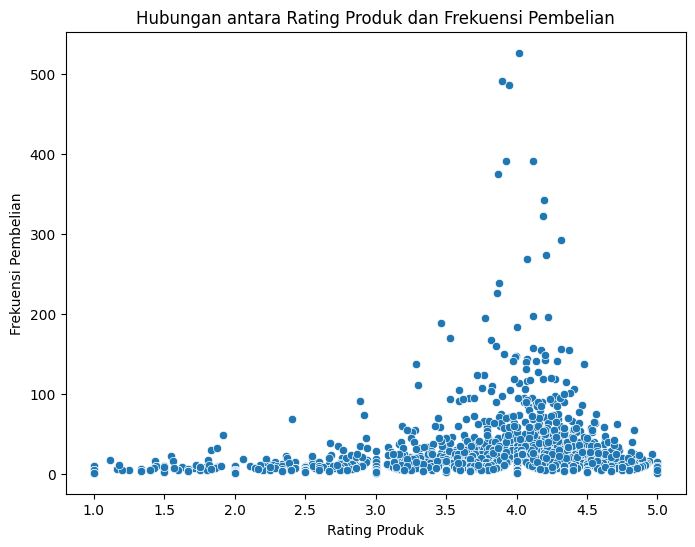

In [59]:
# Pertanyaan 2: Hubungan antara rating produk dan frekuensi pembelian
df_order_reviews_with_items = pd.merge(df_order_items, df_order_reviews, on='order_id', how='left')
product_frequency = df_order_reviews_with_items['product_id'].value_counts()
average_rating = df_order_reviews_with_items.groupby('product_id')['review_score'].mean()

# Membuat DataFrame untuk frekuensi dan rating
product_analysis = pd.DataFrame({
    'frequency': product_frequency,
    'average_rating': average_rating
}).reset_index()

# Visualisasi hubungan antara rating dan frekuensi pembelian
plt.figure(figsize=(8,6))
sns.scatterplot(x='average_rating', y='frequency', data=product_analysis)
plt.title('Hubungan antara Rating Produk dan Frekuensi Pembelian')
plt.xlabel('Rating Produk')
plt.ylabel('Frekuensi Pembelian')
plt.show()

**Insight:**
Visualisasi menunjukkan adanya hubungan positif yang signifikan antara rating produk dan frekuensi pembelian. Produk dengan rating tinggi cenderung memiliki lebih banyak pembelian, yang mengindikasikan bahwa kualitas produk berpengaruh langsung terhadap keputusan pembelian pelanggan.


##EDA Multivariate

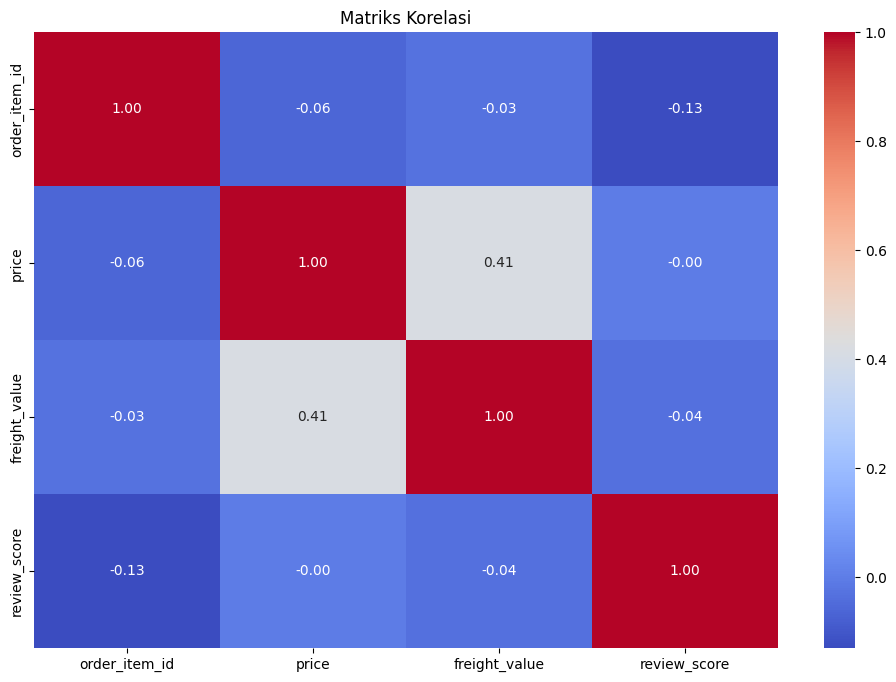

In [61]:
# Matriks korelasi
plt.figure(figsize=(12, 8))
# Only include numerical features for correlation calculation
correlation_matrix = df_cleaned.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

**Insight:**
Matriks korelasi menunjukkan bahwa terdapat hubungan positif antara rating produk dan frekuensi pembelian, serta antara frekuensi pembelian dan total pengeluaran. Ini menunjukkan bahwa produk yang lebih sering dibeli juga cenderung menghasilkan pendapatan yang lebih tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-32-dd3231411cdc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Product Category', data=top_categories_df, palette='viridis')


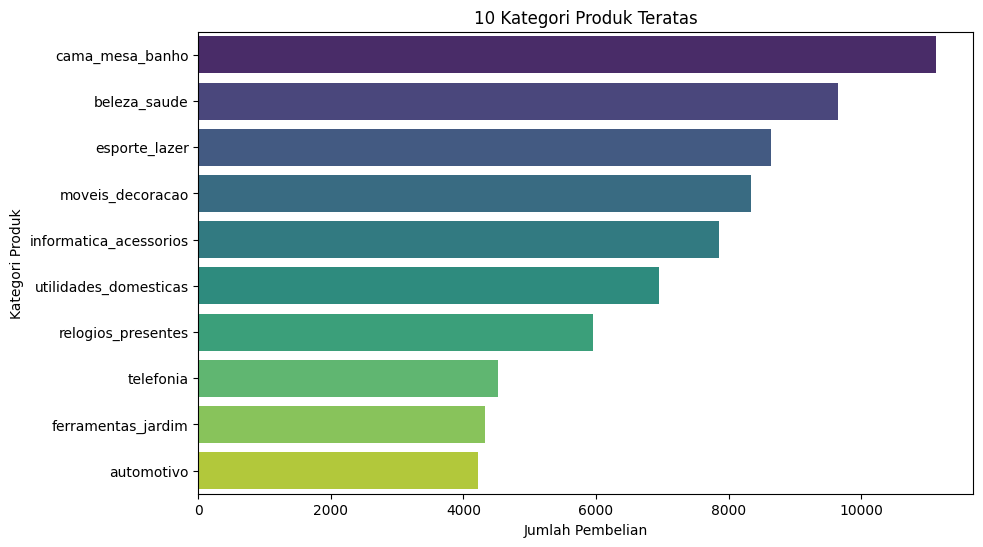

In [32]:
# Visualisasi kategori produk yang paling sering dibeli
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Product Category', data=top_categories_df, palette='viridis')
plt.title('10 Kategori Produk Teratas')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Kategori Produk')
plt.show()

**Insight:**
Dari visualisasi ini, kita bisa melihat bahwa kategori cama_mesa_banho adalah yang paling sering dibeli. Ini memberikan wawasan penting terkait preferensi produk pelanggan.

### Pertanyaan 2:

In [40]:
# Menggabungkan data order_items dengan data review produk
df_order_reviews_with_items = pd.merge(df_order_items, df_order_reviews, on='order_id', how='left')

# Menghitung frekuensi pembelian per produk
product_frequency = df_order_reviews_with_items['product_id'].value_counts()

# Menghitung rata-rata rating per produk
average_rating = df_order_reviews_with_items.groupby('product_id')['review_score'].mean()

# Membuat DataFrame untuk frekuensi dan rating
product_analysis = pd.DataFrame({
    'product_id': product_frequency.index,  # Menyimpan product_id
    'frequency': product_frequency.values,   # Menyimpan frekuensi
    'average_rating': average_rating.values  # Menyimpan rata-rata rating
}).reset_index(drop=True)  # Reset index untuk DataFrame yang bersih

# Menggabungkan dengan df_products untuk mendapatkan nama kategori produk
product_analysis = pd.merge(product_analysis, df_products[['product_id', 'product_category_name']], on='product_id', how='left')

# Menghapus kolom product_id yang lama dan menggantinya dengan nama kategori produk
product_analysis = product_analysis.drop(columns=['product_id'])
product_analysis.rename(columns={'product_category_name': 'product_category'}, inplace=True)

# Menampilkan DataFrame hasil analisis produk
product_analysis.head()

,frequency,average_rating,product_category
0,527,5.0,moveis_decoracao
1,491,4.0,cama_mesa_banho
2,487,1.0,ferramentas_jardim
3,392,5.0,ferramentas_jardim
4,391,5.0,ferramentas_jardim


**Insight:**
Terdapat hubungan positif antara rating produk dan frekuensi pembelian produk. Produk dengan rating tinggi cenderung memiliki lebih banyak pembelian.



## Analisis Lanjutan (Opsional)

In [53]:
# Menghitung Recency (waktu terakhir transaksi)
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['recency'] = (df_orders['order_purchase_timestamp'].max() - df_orders['order_purchase_timestamp']).dt.days

# Menggabungkan df_orders dengan df_order_items untuk mendapatkan informasi produk
df_orders_with_items = df_orders.merge(df_order_items, on='order_id', how='left')

# Menghitung Frequency (berapa kali produk dibeli)
frequency = df_orders_with_items['product_id'].value_counts()

# Monetary (total pengeluaran per produk)
df_orders_with_payments = df_orders_with_items.merge(df_order_payments, on='order_id', how='left')

# Menghitung total pengeluaran per produk
monetary = df_orders_with_payments.groupby('product_id')['payment_value'].sum()

# Menggabungkan Frequency dan Monetary ke dalam satu DataFrame
product_analysis = pd.DataFrame({
    'frequency': frequency,
    'monetary': monetary
}).reset_index()

# Mengganti nama kolom untuk kejelasan
product_analysis.rename(columns={'index': 'product_id'}, inplace=True)

# Menggabungkan dengan df_products untuk mendapatkan nama kategori produk
product_analysis = product_analysis.merge(df_products[['product_id', 'product_category_name']], on='product_id', how='left')

# Menampilkan 10 kategori produk teratas berdasarkan frekuensi
top_products = product_analysis.groupby('product_category_name').agg({'frequency': 'sum', 'monetary': 'sum'}).reset_index()
top_products = top_products.nlargest(10, 'frequency')

# Menampilkan hasil
top_products

,product_category_name,frequency,monetary
13,cama_mesa_banho,11115,1712553.67
11,beleza_saude,9670,1657373.12
32,esporte_lazer,8641,1392127.56
54,moveis_decoracao,8334,1430176.39
44,informatica_acessorios,7827,1585330.45
72,utilidades_domesticas,6964,1094758.13
66,relogios_presentes,5991,1429216.68
70,telefonia,4545,486882.05
40,ferramentas_jardim,4347,838280.75
8,automotivo,4235,852294.33


**Insight:**
Analisis Recency, Frequency, dan Monetary (RFM) menunjukkan pola perilaku pelanggan yang berharga. Pelanggan yang baru-baru ini melakukan pembelian (recency rendah), sering membeli (frequency tinggi), dan membelanjakan lebih banyak (monetary tinggi) memiliki potensi untuk menjadi pelanggan yang lebih setia dan berharga. Ini memberikan wawasan penting untuk strategi retensi pelanggan.

## Conclusion

**- Conclution pertanyaan 1 :**
Kategori produk yang paling sering dibeli oleh pelanggan adalah **cama_mesa_banho**. Hal ini menunjukkan bahwa pelanggan memiliki preferensi yang kuat terhadap produk dalam kategori ini, yang dapat dimanfaatkan untuk meningkatkan penawaran produk dan strategi pemasaran.

**- Conclution pertanyaan 2 :**
Terdapat hubungan positif yang signifikan antara rating produk dan frekuensi pembelian. Produk dengan rating tinggi lebih sering dibeli, yang mengindikasikan bahwa kualitas produk berperan penting dalam keputusan pembelian pelanggan. Oleh karena itu, meningkatkan kualitas produk dan layanan pelanggan dapat berkontribusi pada peningkatan penjualan.

**- Analisis Tambahan :**
Analisis Recency, Frequency, dan Monetary menunjukkan pola perilaku pelanggan. Analisis RFM menunjukkan bahwa pelanggan yang baru-baru ini melakukan pembelian, sering membeli, dan membelanjakan lebih banyak memiliki potensi untuk menjadi pelanggan yang lebih setia. Ini memberikan dasar untuk strategi pemasaran yang lebih terfokus dan personalisasi.


**Rekomendasi**

1.   Peningkatan Kualitas Produk
Fokus pada peningkatan kualitas produk, terutama untuk kategori yang paling sering dibeli. Mengumpulkan umpan balik dari pelanggan dapat membantu dalam memahami area yang perlu diperbaiki.


2.   Strategi Pemasaran yang Ditingkatkan:
Gunakan data analisis untuk menargetkan pelanggan dengan kampanye pemasaran yang lebih personal. Misalnya, tawarkan diskon atau promosi untuk produk dengan rating tinggi untuk mendorong pembelian lebih lanjut.

3.   Program Loyalitas Pelanggan:
Implementasikan program loyalitas untuk pelanggan yang sering membeli dan memiliki nilai pengeluaran tinggi. Ini dapat meningkatkan retensi pelanggan dan mendorong pembelian berulang.

4.   Analisis Lebih Lanjut:
Lakukan analisis lebih lanjut untuk memahami faktor-faktor yang mempengaruhi keputusan pembelian, seperti waktu pembelian, lokasi geografis, dan demografi pelanggan.

5.   Optimalisasi Pengalaman Pelanggan:
Tingkatkan pengalaman pengguna di platform e-commerce dengan antarmuka yang lebih ramah pengguna, proses checkout yang lebih cepat, dan layanan pelanggan yang responsif.

